# AirBNB data EDA: feature distributions

## Notebook set-up

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


## 1. Data loading

In [2]:
data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
data_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 2. Categorical features

### 2.1. Levels

In [3]:
categorical_features=['neighbourhood_group','neighbourhood','room_type','host_name']

print('Unique levels by feature')
data_df[categorical_features].nunique()

Unique levels by feature


neighbourhood_group        5
neighbourhood            221
room_type                  3
host_name              11452
dtype: int64

### 2.2. Level counts

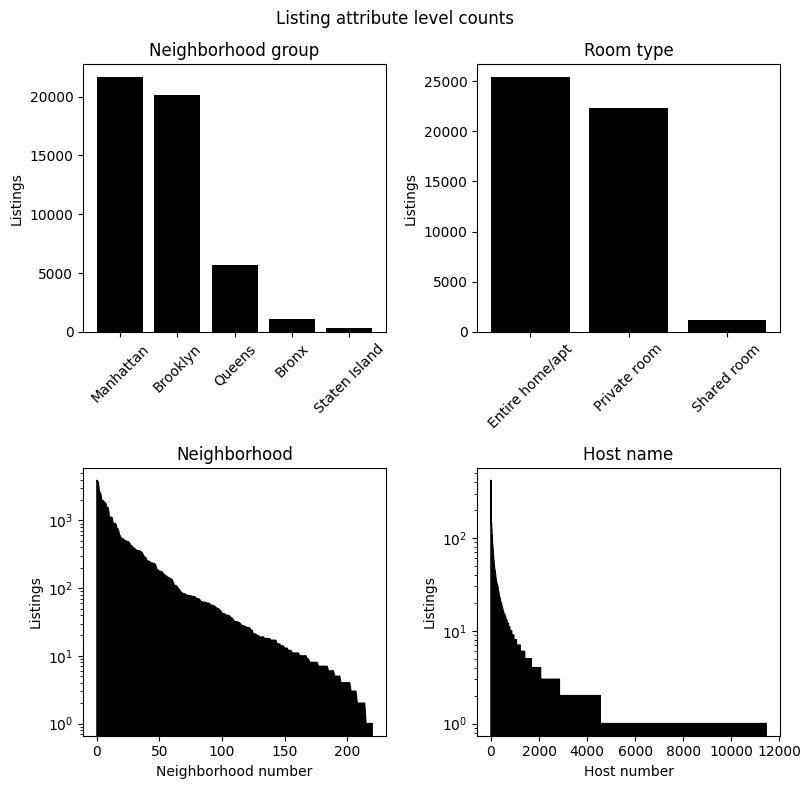

In [4]:
fig, axs=plt.subplots(2,2, figsize=(8,8))
axs=axs.flatten()

fig.suptitle('Listing attribute level counts')

# Plot neighborhood group level counts
level_counts=data_df['neighbourhood_group'].value_counts()

axs[0].set_title('Neighborhood group')
axs[0].bar(list(range(len(level_counts))), level_counts, tick_label=level_counts.index, color='black')
axs[0].tick_params(axis='x', labelrotation=45)
axs[0].set_ylabel('Listings')

# Plot room type level counts
level_counts=data_df['room_type'].value_counts()

axs[1].set_title('Room type')
axs[1].bar(list(range(len(level_counts))), level_counts, tick_label=level_counts.index, color='black')
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].set_ylabel('Listings')

# Plot neighborhood level counts
level_counts=data_df['neighbourhood'].value_counts()

axs[2].set_title('Neighborhood')
axs[2].fill_between(list(range(len(level_counts))), level_counts, color='black')
axs[2].set_xlabel('Neighborhood number')
axs[2].set_ylabel('Listings')
axs[2].set_yscale('log')

# Plot neighborhood level counts
level_counts=data_df['host_name'].value_counts()

axs[3].set_title('Host name')
axs[3].fill_between(list(range(len(level_counts))), level_counts, color='black')
axs[3].set_xlabel('Host number')
axs[3].set_ylabel('Listings')
axs[3].set_yscale('log')

plt.tight_layout()

## 3. Numerical features

### 3.1. Descriptive statistics

In [5]:
numeric_features=['latitude','longitude','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']

data_df[numeric_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.19000,0.72000,2.020000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


### 3.2. Distribution plots

#### 3.2.1. Latitude & longitude

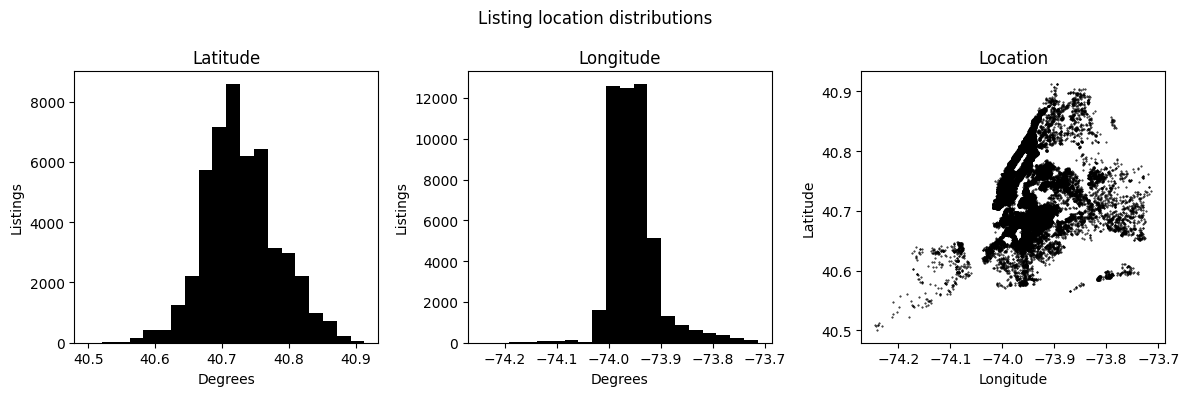

In [6]:
fig, axs=plt.subplots(1,3, figsize=(12,4))
axs=axs.flatten()

fig.suptitle('Listing location distributions')

axs[0].set_title('Latitude')
axs[0].hist(data_df['latitude'], color='black', bins=20)
axs[0].set_xlabel('Degrees')
axs[0].set_ylabel('Listings')

axs[1].set_title('Longitude')
axs[1].hist(data_df['longitude'], color='black', bins=20)
axs[1].set_xlabel('Degrees')
axs[1].set_ylabel('Listings')

axs[2].set_title('Location')
axs[2].scatter(data_df['longitude'], data_df['latitude'], s=0.2, color='black')
axs[2].set_xlabel('Longitude')
axs[2].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

#### 3.2.2. Other listing attributes

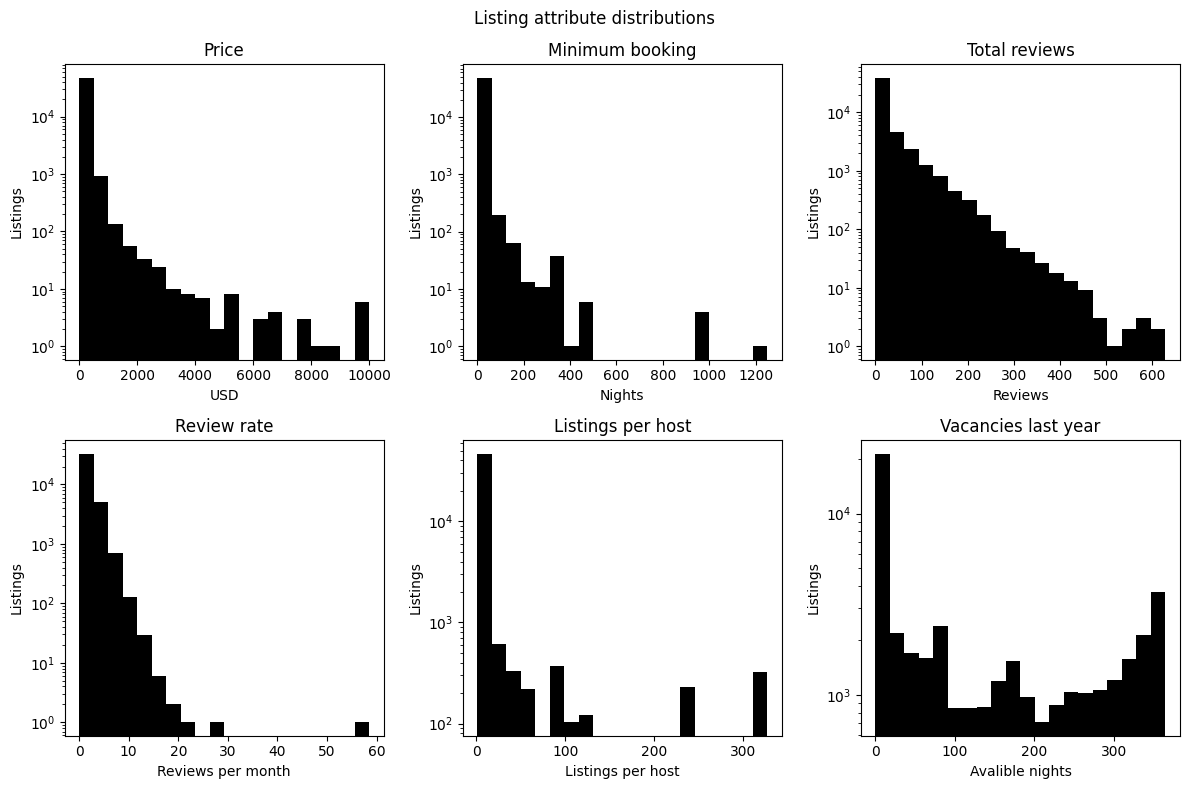

In [7]:
features=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
plot_titles=['Price', 'Minimum booking', 'Total reviews', 'Review rate', 'Listings per host', 'Vacancies last year']
xlabels=['USD', 'Nights', 'Reviews', 'Reviews per month', 'Listings per host', 'Avalible nights']

fig, axs=plt.subplots(2,3, figsize=(12,8))
axs=axs.flatten()

fig.suptitle('Listing attribute distributions')

for i, (plot_title, feature, xlabel) in enumerate(zip(plot_titles, features, xlabels)):

    axs[i].set_title(plot_title)
    axs[i].hist(data_df[feature], bins=20, color='black')
    axs[i].set_xlabel(xlabel)
    axs[i].set_ylabel('Listings')
    axs[i].set_yscale('log')

plt.tight_layout()
